In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(2)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    height = rows_count * (tile_height + space_between_tiles)
    width = cols_count * (tile_width + space_between_tiles)
    
    img_matrix = np.empty(shape=(height, width))
    img_matrix.fill(np.nan)
    
    for x in range(rows_count):
        for y in range(cols_count):
            row_index = x * (tile_height + space_between_tiles)
            col_index = y * (tile_width + space_between_tiles)
            img_matrix[row_index:row_index + tile_height, col_index:col_index + tile_width] = examples[x, y]
    
    
    return img_matrix

## MNIST Dataset

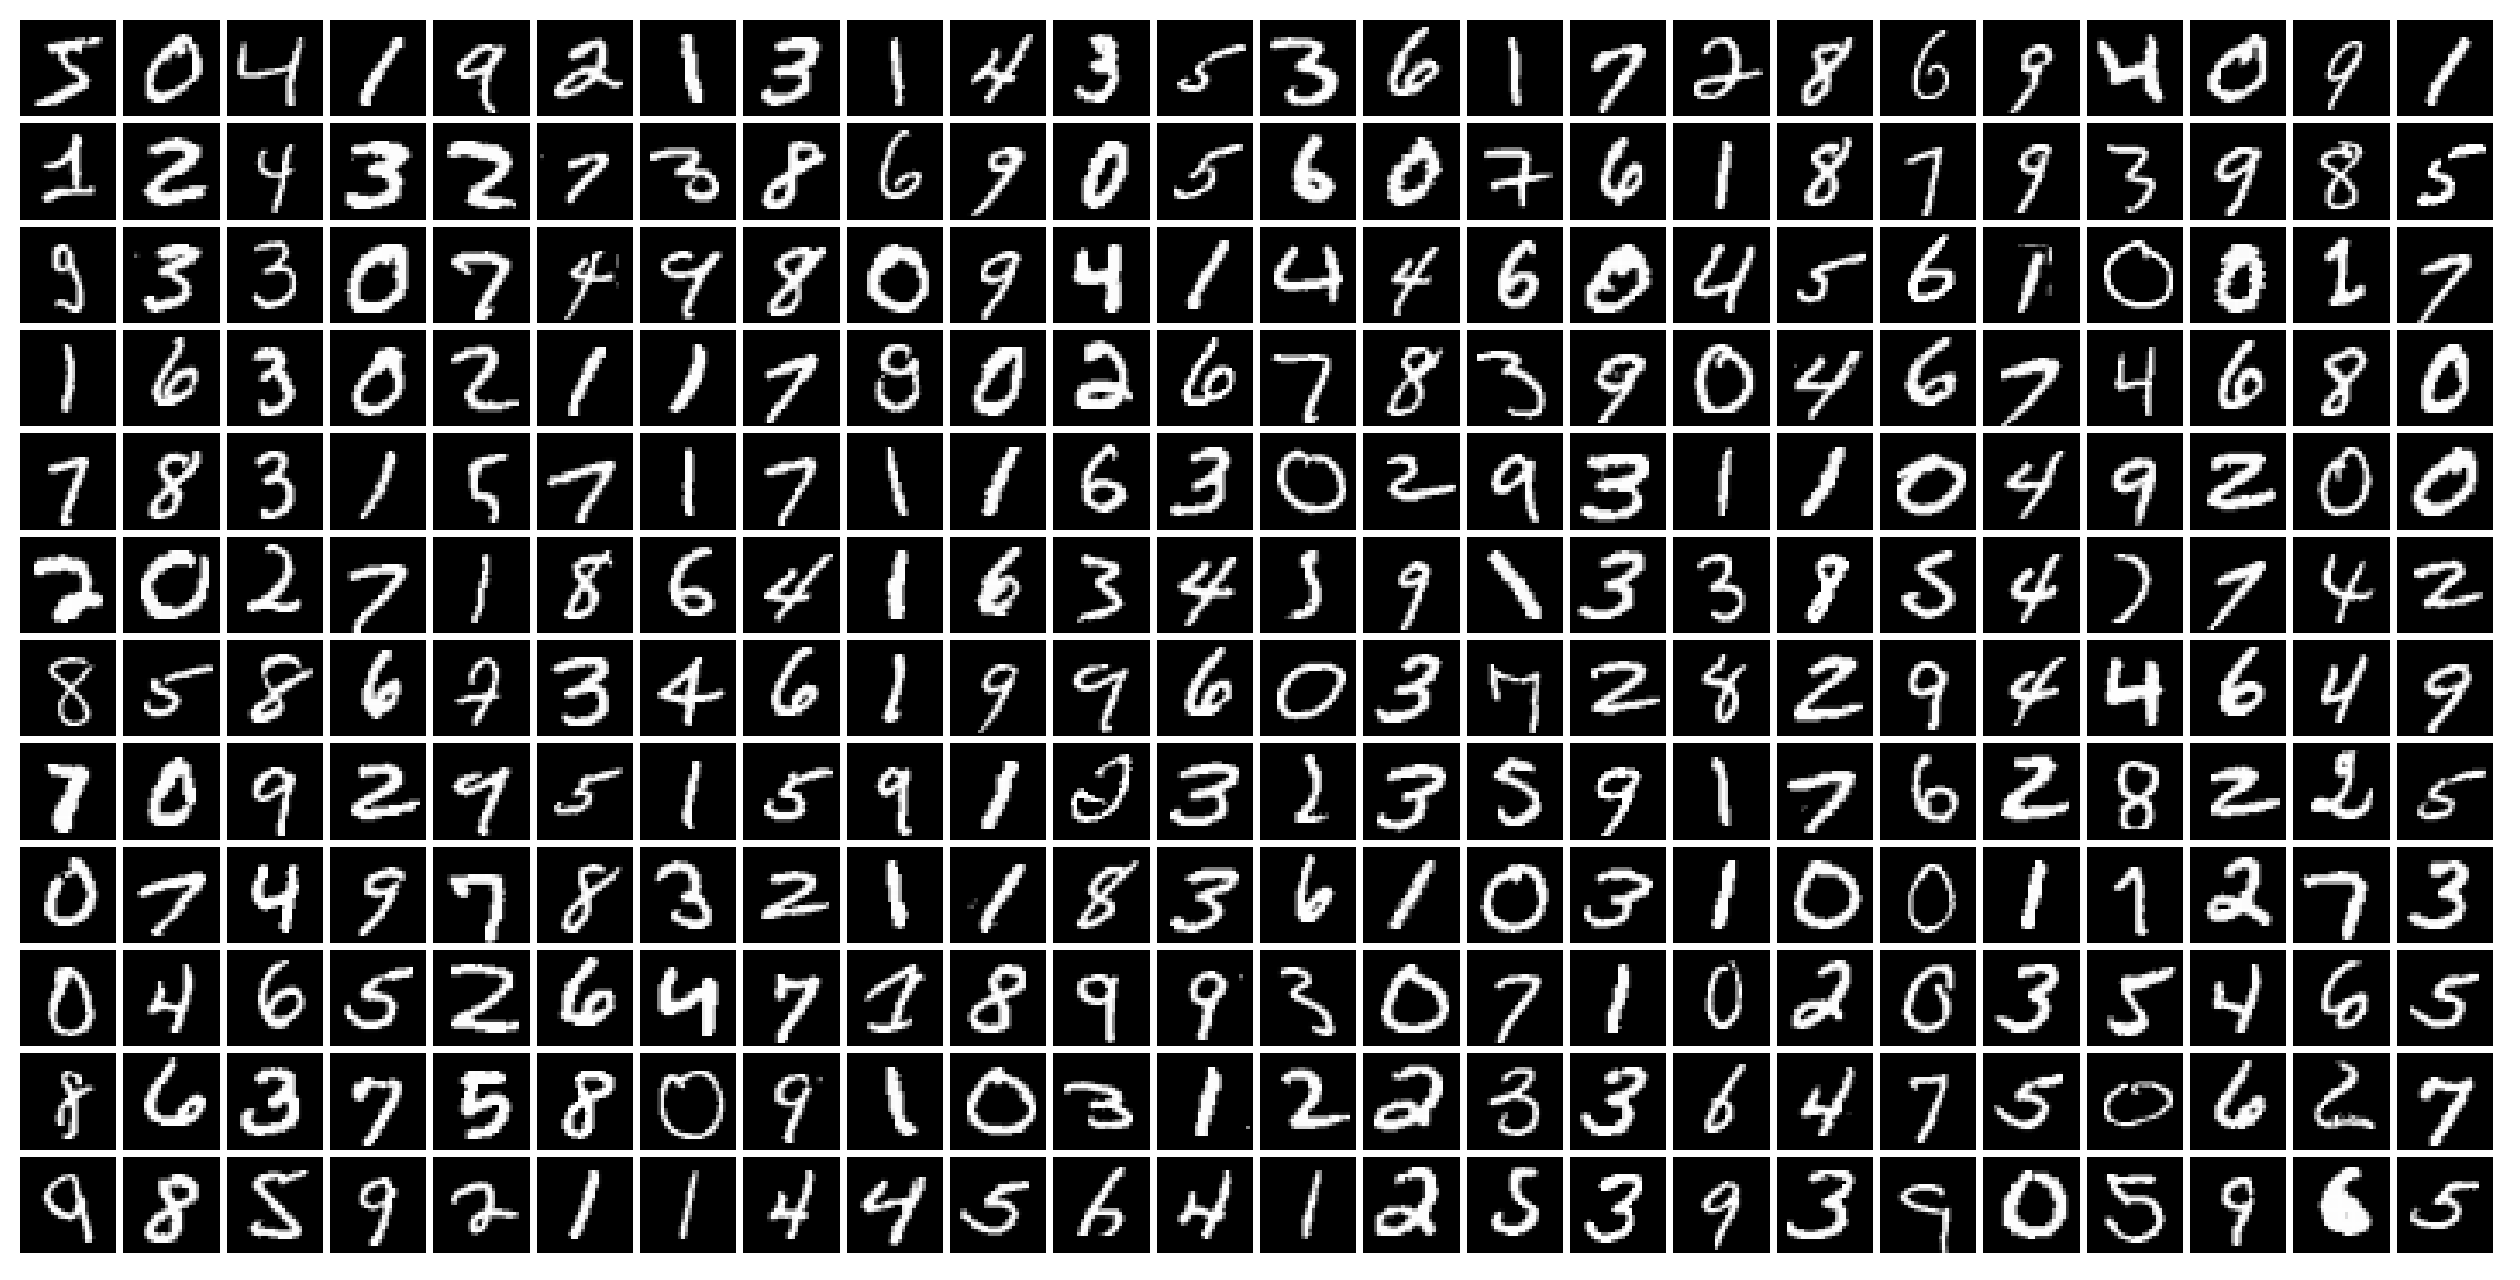

In [3]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [4]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [7]:
X = X.reshape(X.shape[0], -1)


In [10]:
X.shape

# X.shape[0]

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [39]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = (y == i)
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label=f"digit: {i}") 

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [40]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [42]:
X_pca_embedded.shape

(2000, 2)

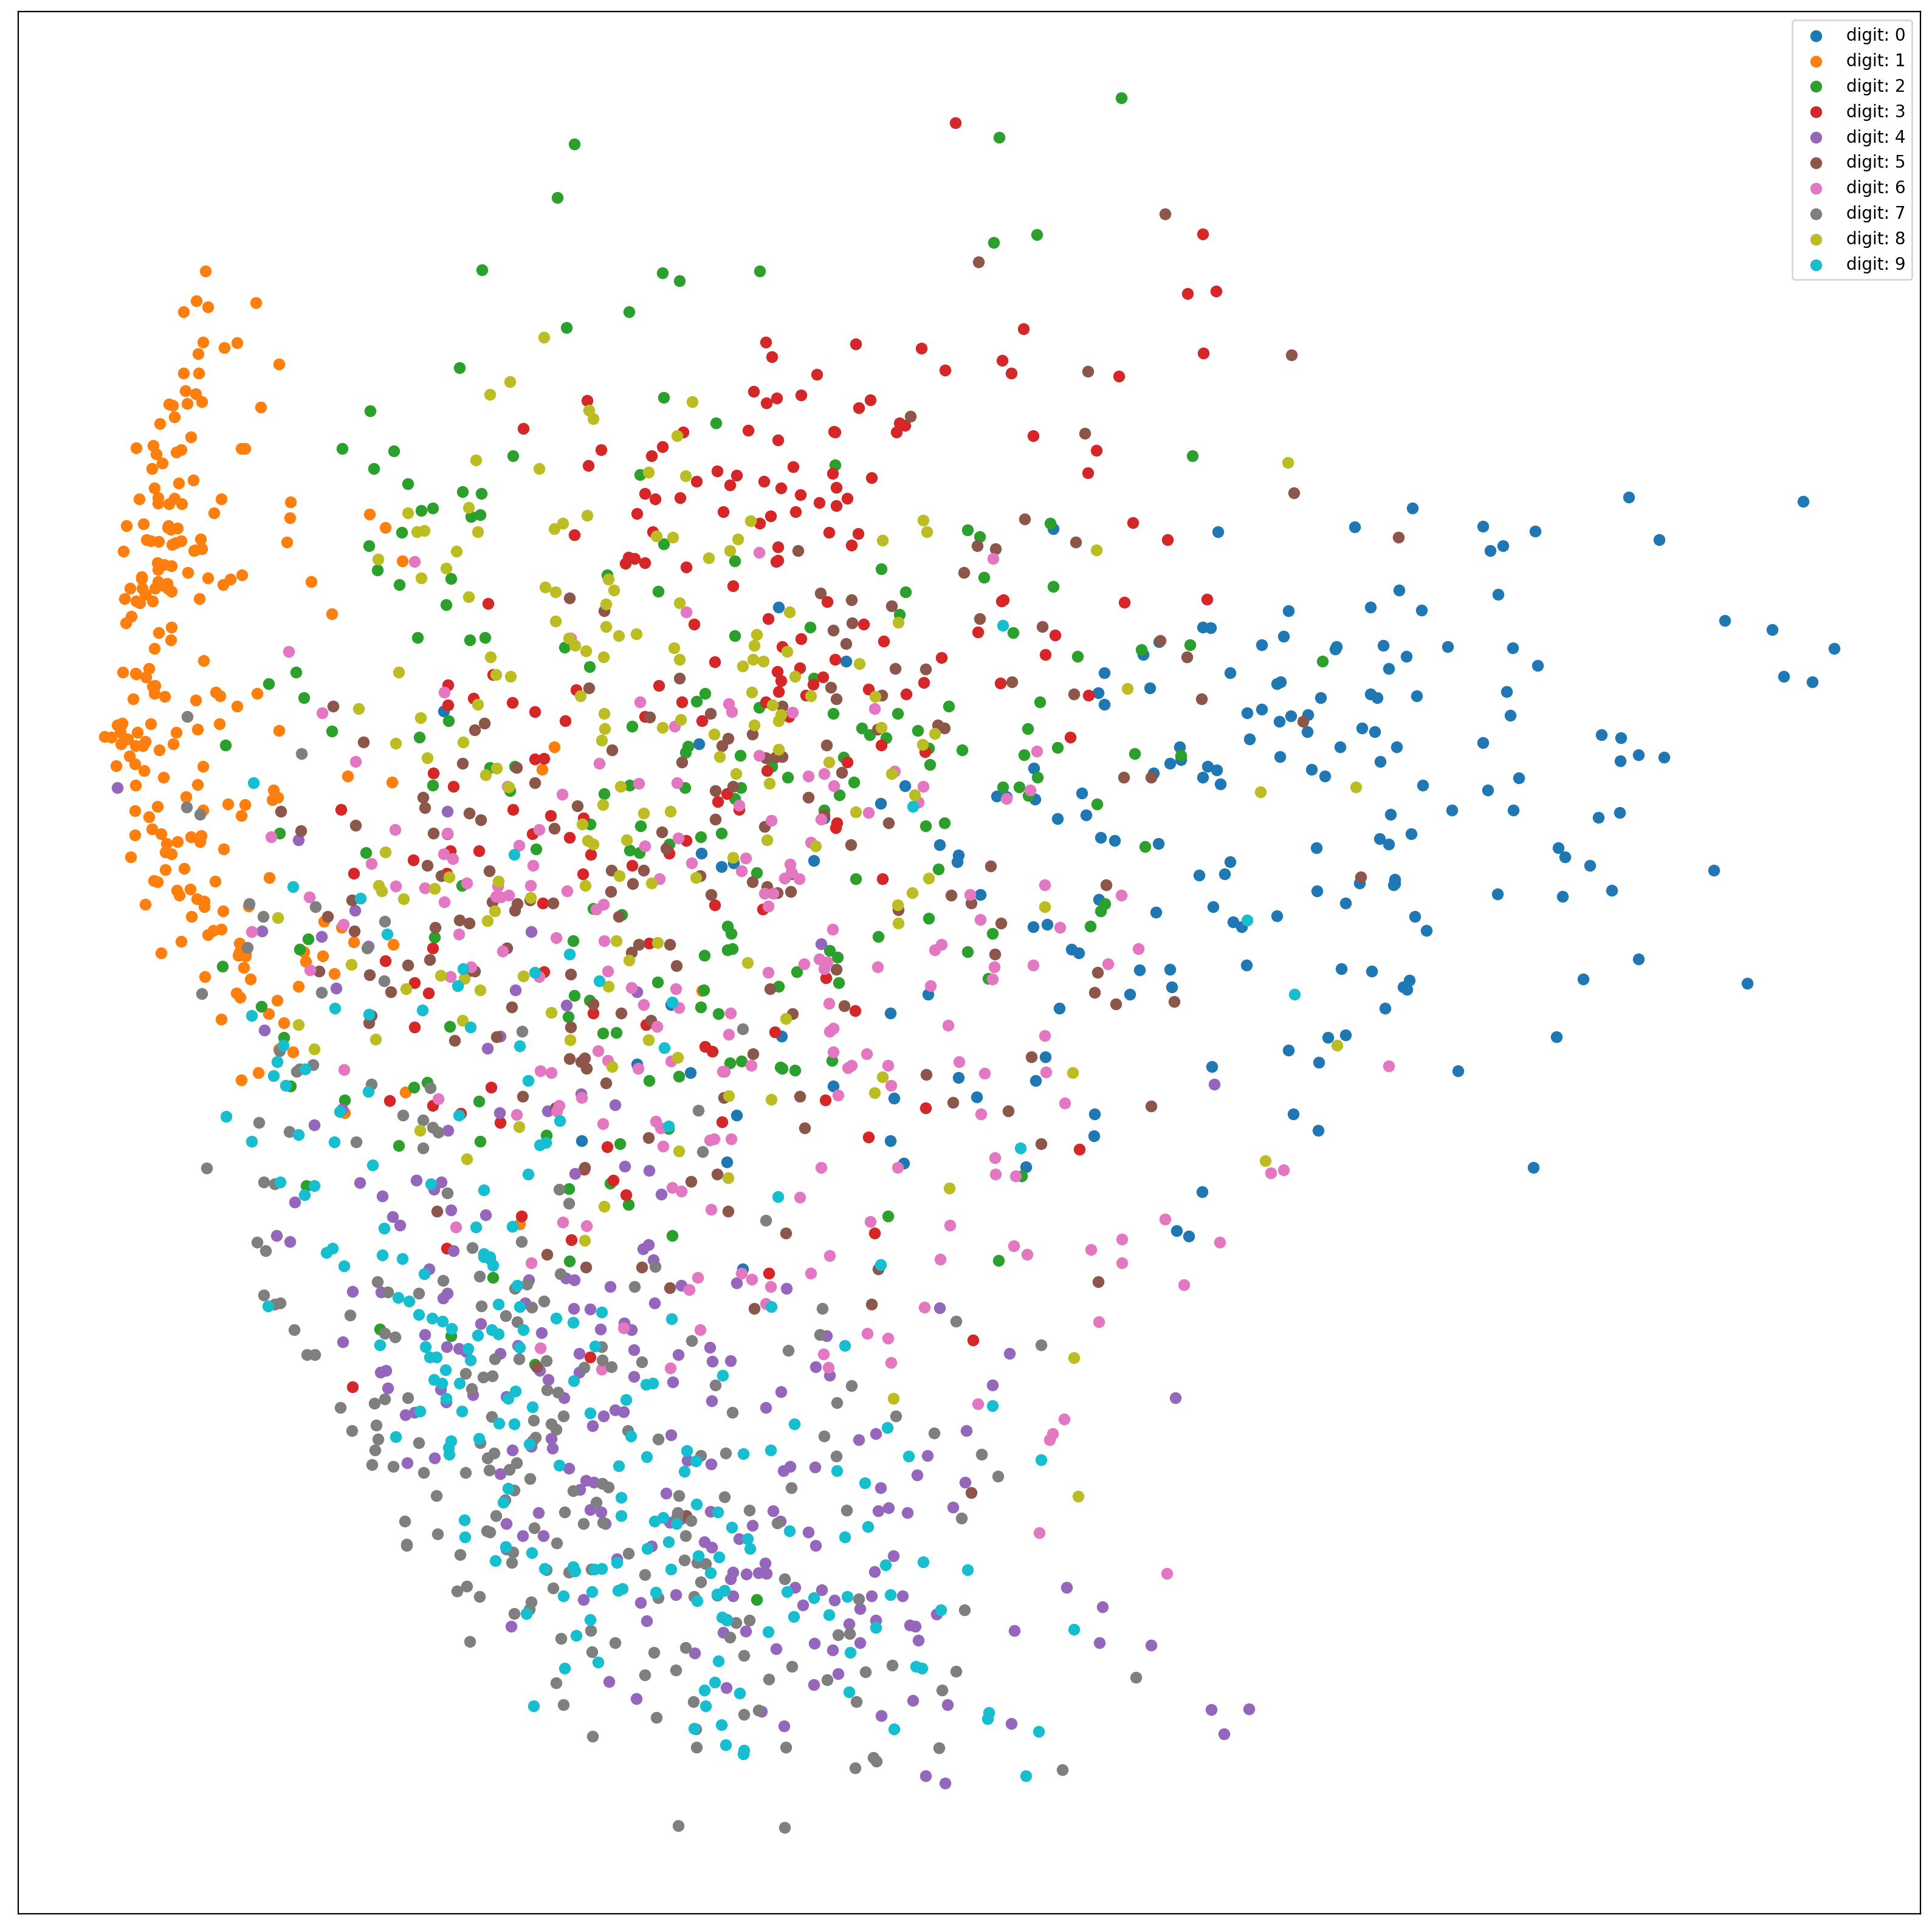

In [43]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 1.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.235s
[t-SNE] Iteration 50: error = 77.8404922, gradient norm = 0.0138958 (50 iterations in 4.225s)
[t-SNE] Iteration 100: error = 75.6770477, gradient norm = 0.0004480 (50 iterations in 4.007s)
[t-SNE] Iteration 150: error = 75.6460571, gradient norm = 0.0007712 (50 iterations in 4.501s)
[t-SNE] Iteration 200: error = 75.5843658, gradient norm = 0.0005688 (50 iterations in 4.694s)
[t-SNE] Iteration 250: error = 75.5456543, gradient norm = 0.0002574 (50 iterations in 4.706s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.545654
[t-SNE] Iteration 300: error = 1.7905790, gradient norm = 0.0210313 (50 iterations in 4.508s)

In [45]:
X_tsne_embedded.shape

(2000, 2)

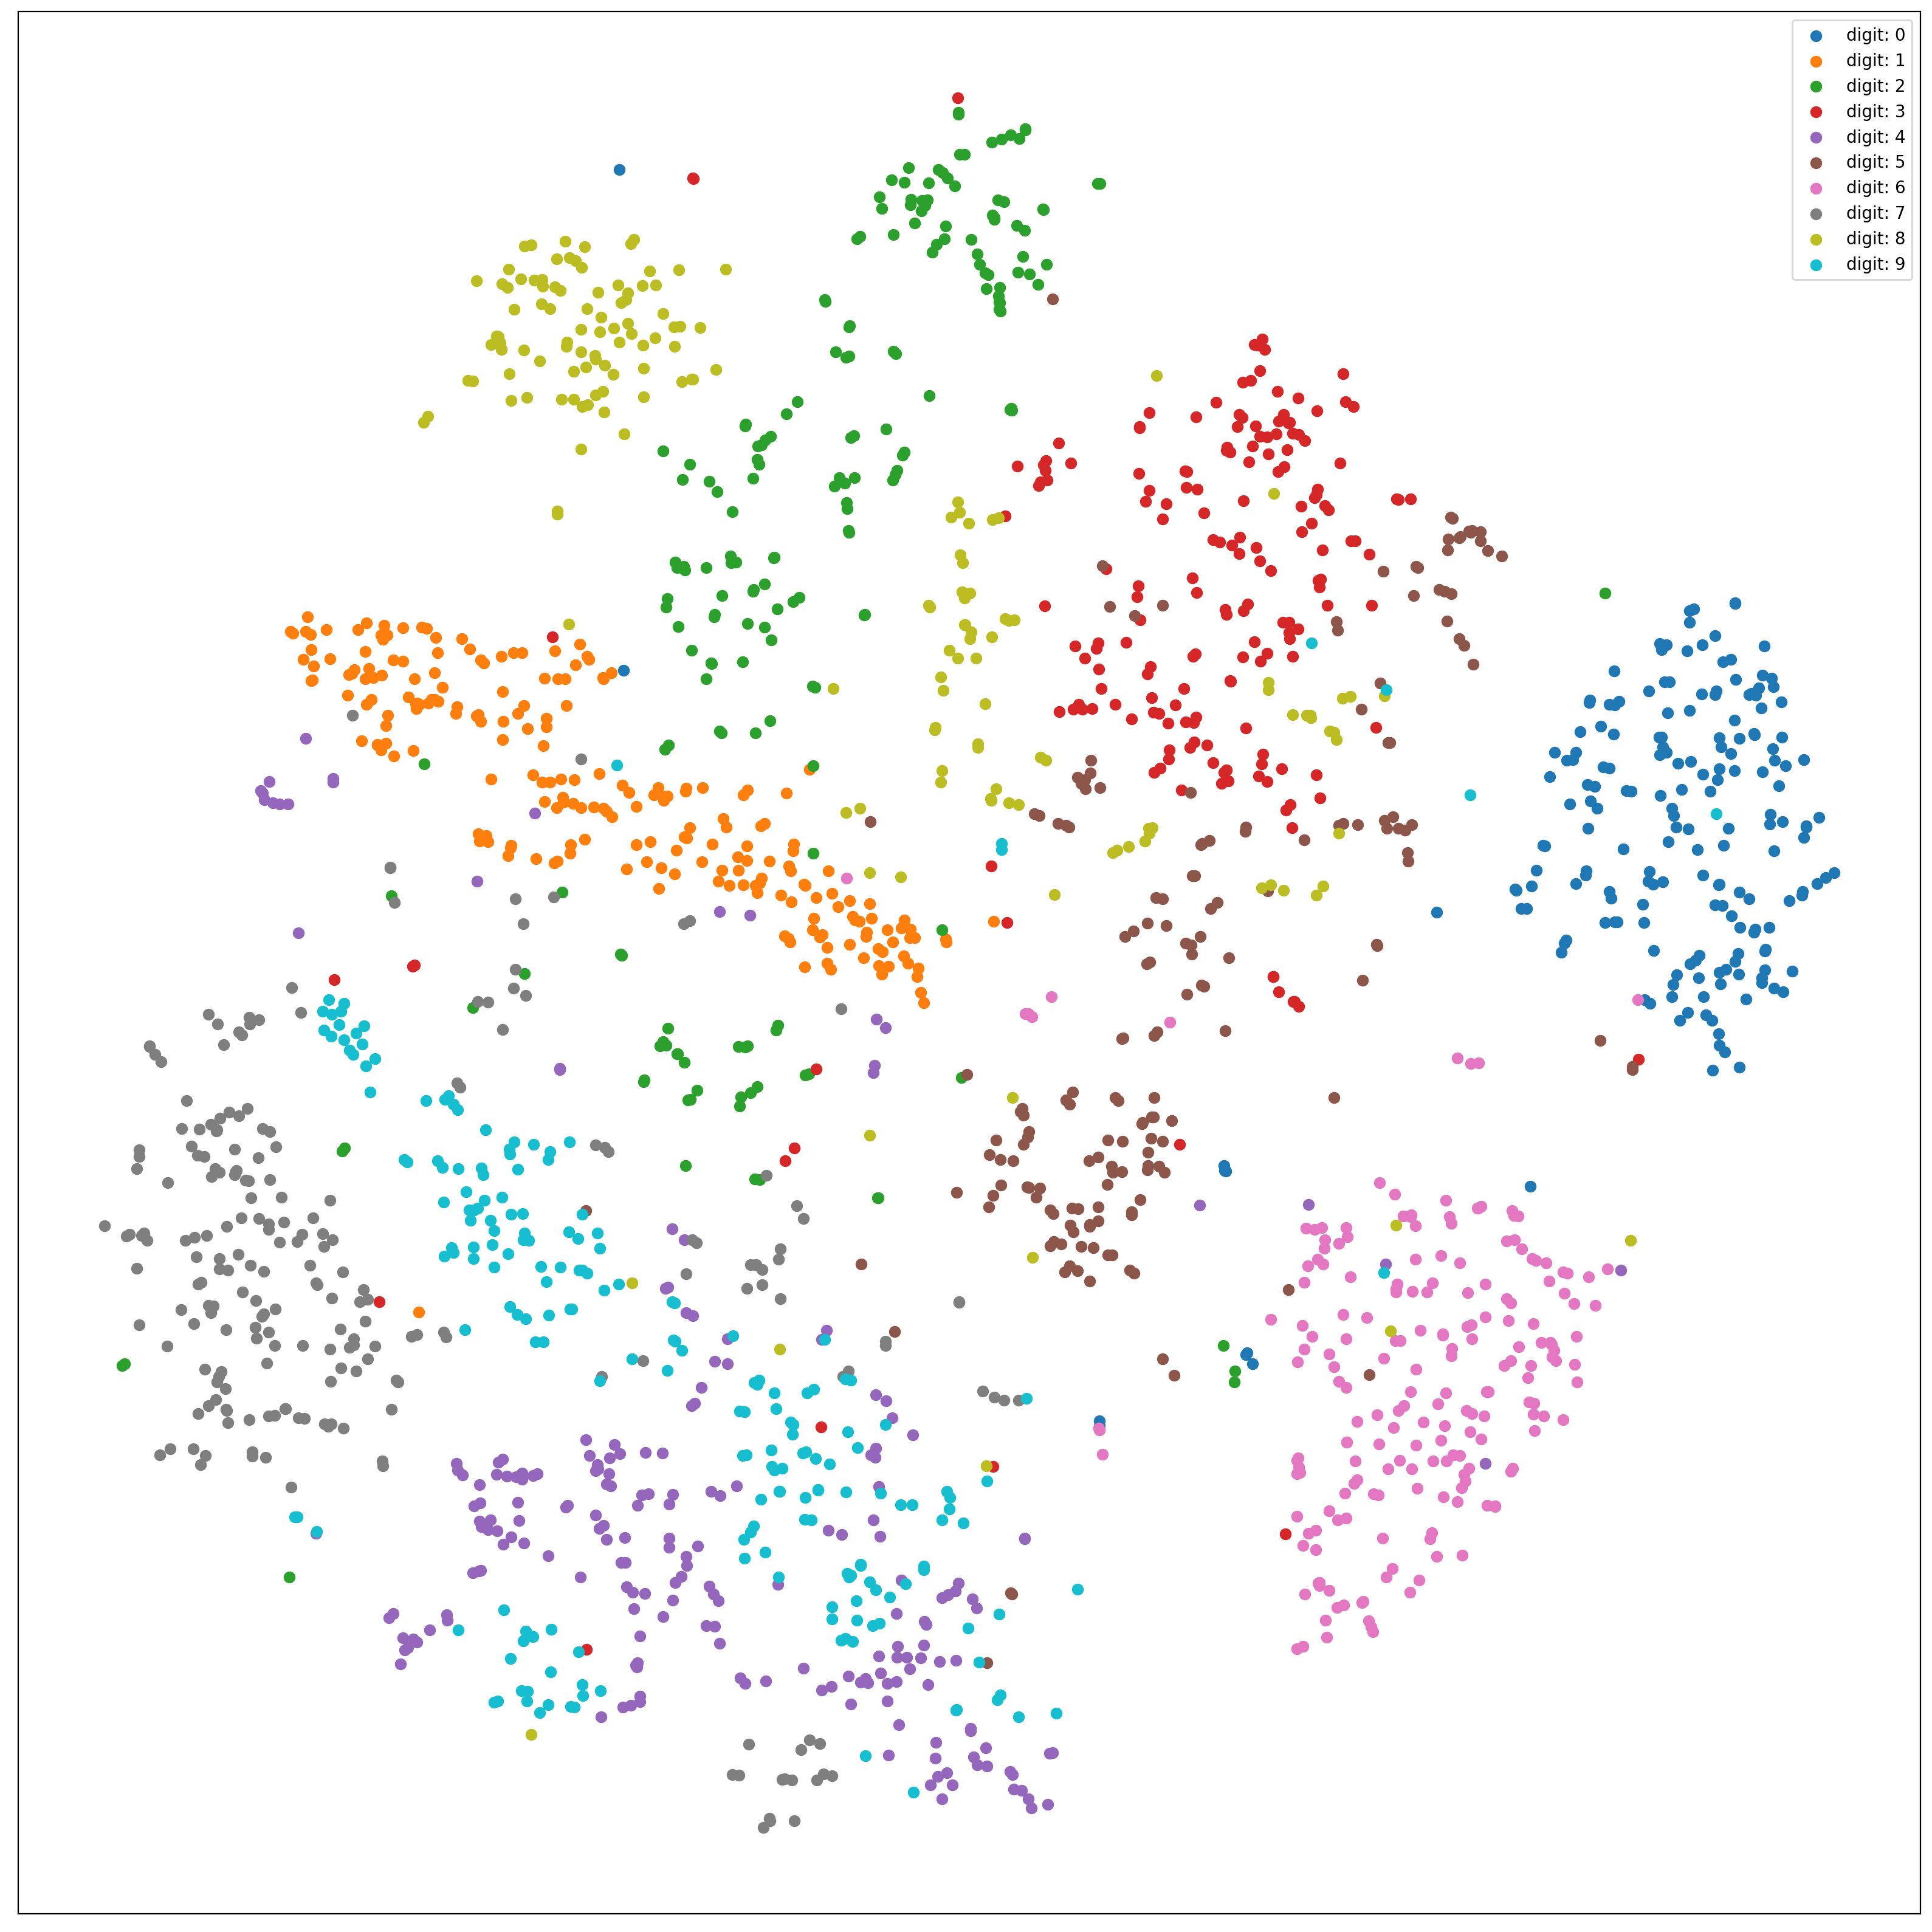

In [46]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [88]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# def plot_3d_mnist_plotly_scatter(X, y):
#     def make_trace(i):
#         digit_indeces = y == i
#         return go.Scatter3d(
#             x=X[digit_indeces, 0],
#             y=X[digit_indeces, 1],
#             z=X[digit_indeces, 2],
#             mode='markers',
#             name=str(i),
#             marker=dict(
#                 color=i,
#                 colorscale='Jet',
#                 size=4,
#                 symbol='circle',
#                 line=dict(
#                     color='rgb(204, 204, 204)',
#                     width=1
#                 )
#             )
#         )
        
#     traces = [make_trace(i) for i in range(10)]
    
#     layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
#     fig = go.Figure(data=traces, layout=layout)
#     iplot(fig)

def plot_3d_mnist_plotly_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    plot = fig.add_subplot(projection="3d")

    for i in range(10):
        digit_indeces = (y == i)
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        dim3 = X[digit_indeces, 2]
        plot.scatter(dim1, dim2, dim3, label=f"digit: {i}") 

    plot.set_xticks(())
    plot.set_yticks(())
    # plot.set_zticks(())
    
    plt.tight_layout()
    plt.legend()
    plt.show()

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [89]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small)


In [90]:
X_3d_pca_embedded.shape

(2000, 3)

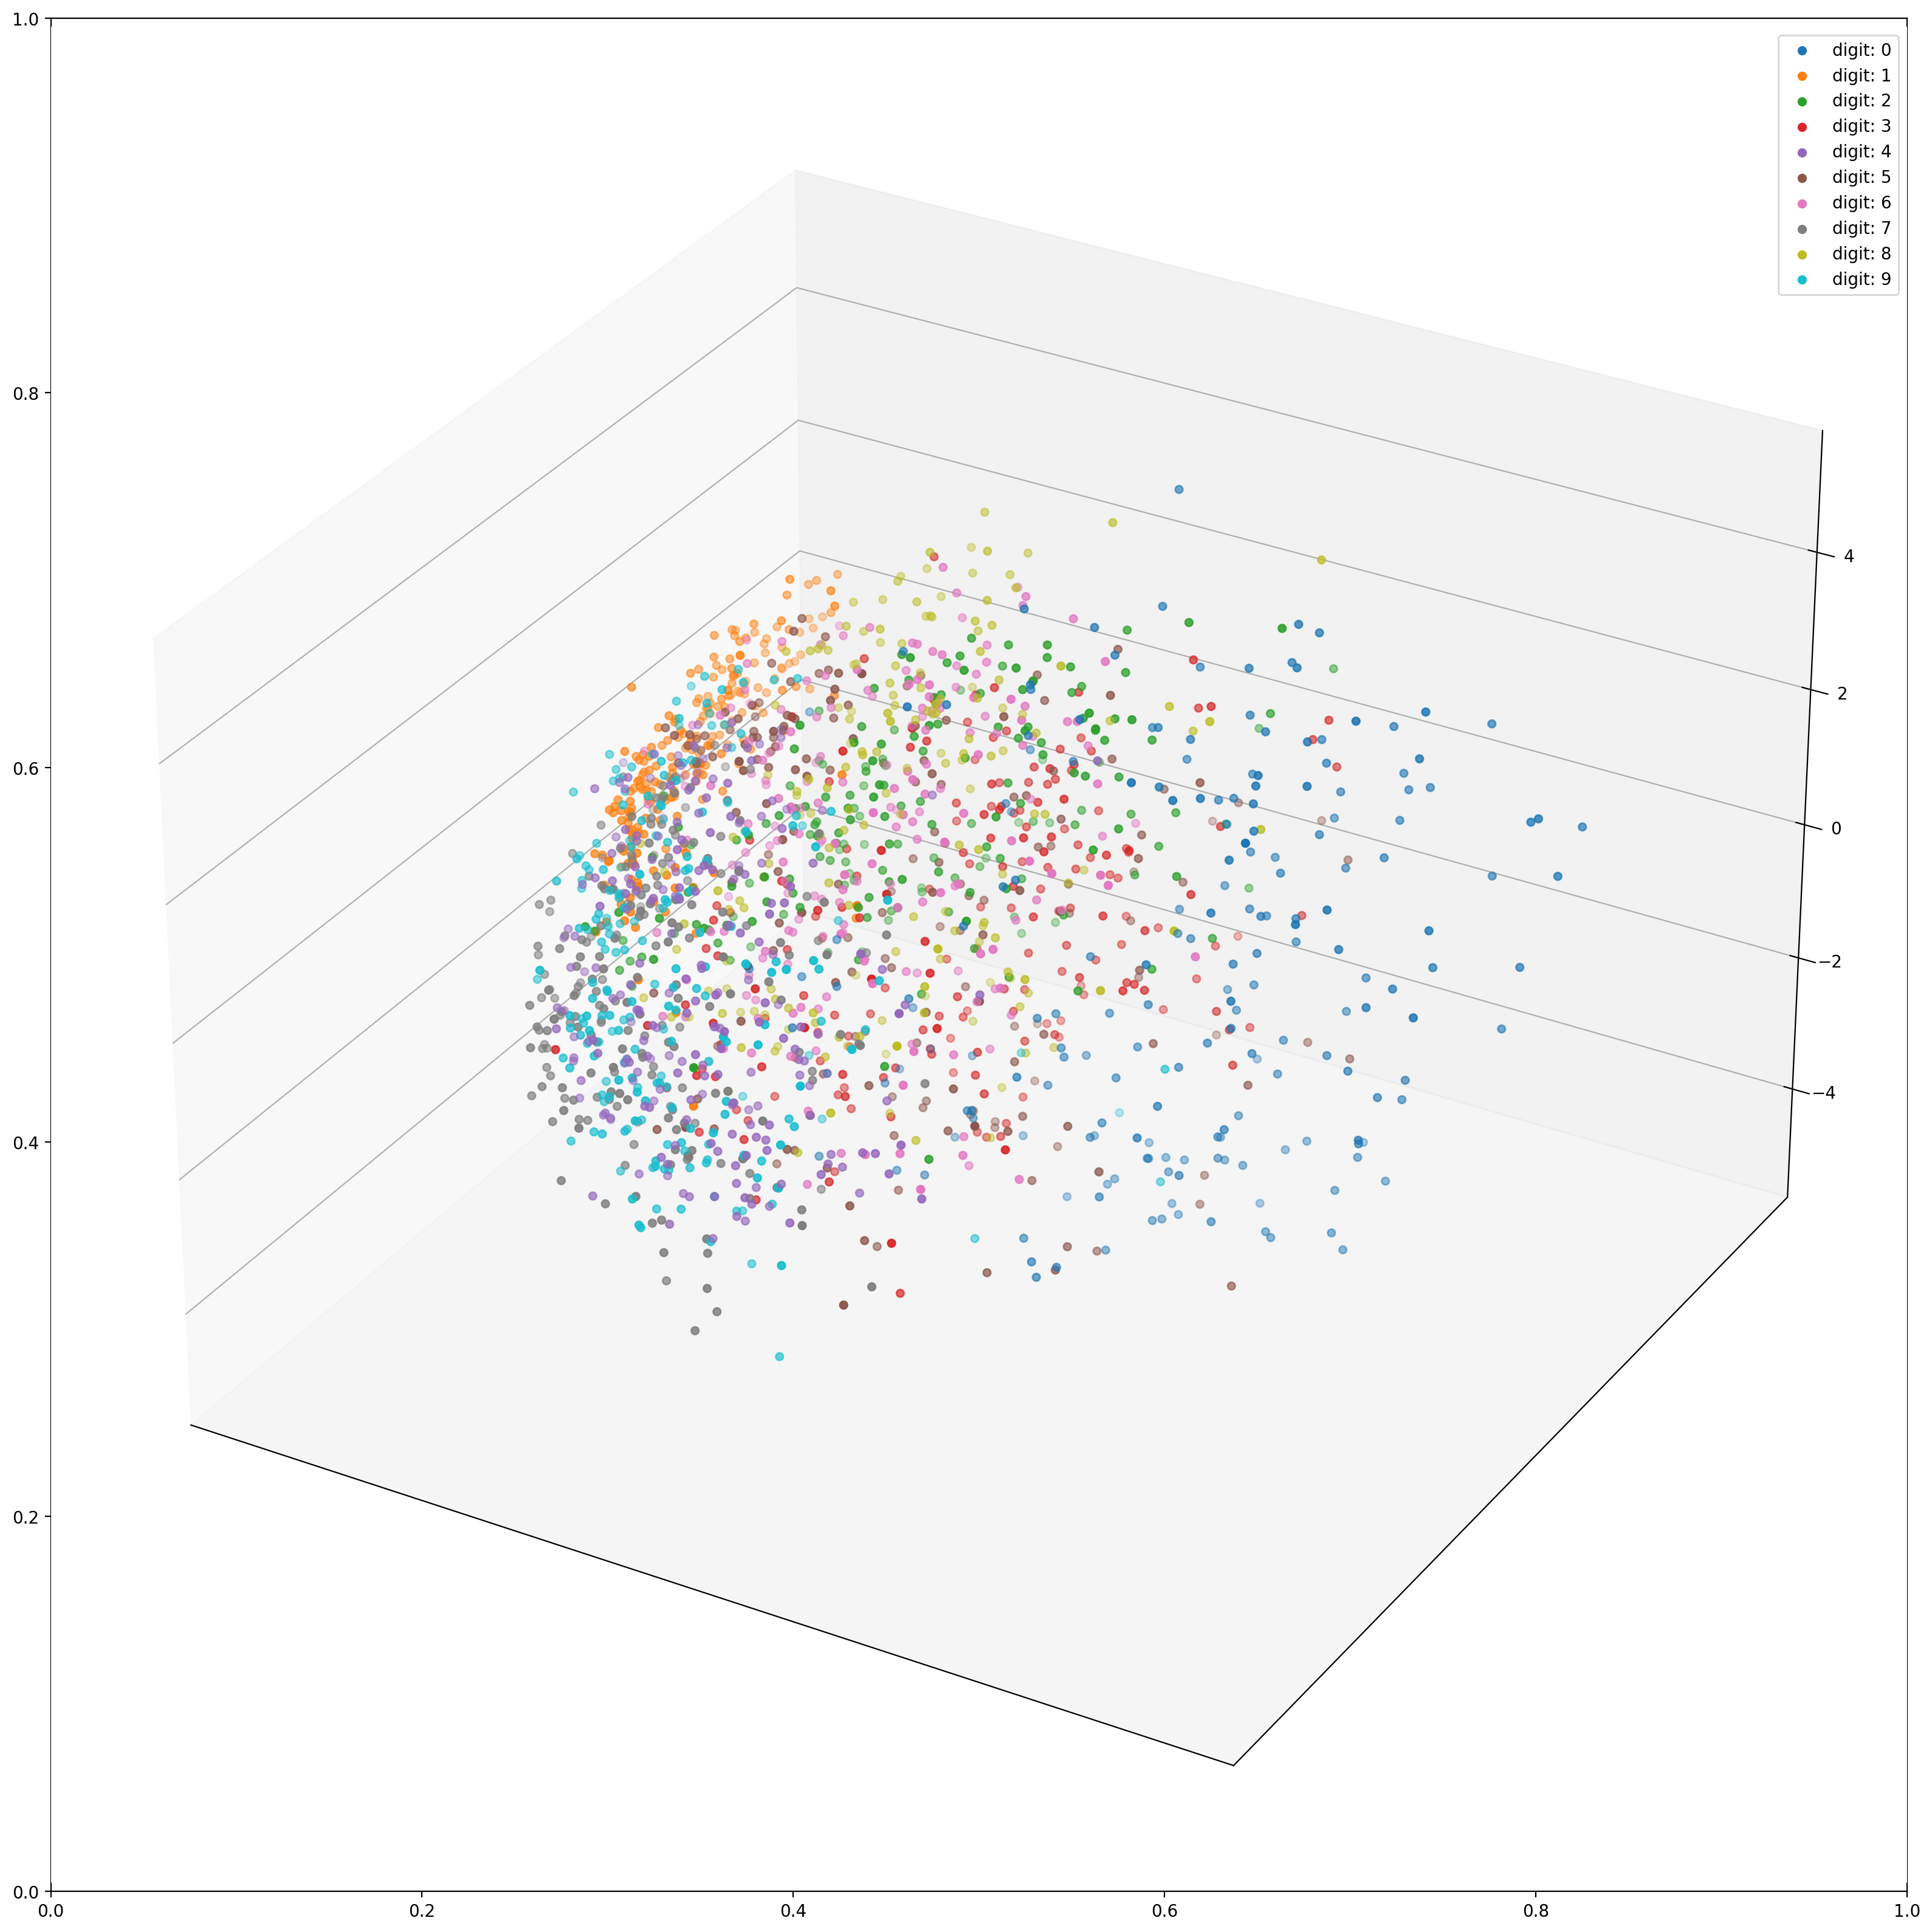

In [91]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [76]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [80]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [81]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       208
           1       0.92      0.97      0.94       229
           2       0.91      0.88      0.89       184
           3       0.93      0.90      0.91       201
           4       0.90      0.93      0.91       207
           5       0.87      0.90      0.88       182
           6       0.95      0.98      0.97       212
           7       0.97      0.92      0.95       208
           8       0.91      0.84      0.87       187
           9       0.91      0.93      0.92       182

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.92      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# raise Exception("Not implemented!")

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[205   0   1   0   0   0   1   0   1   0]
 [  0 222   2   1   0   2   0   0   2   0]
 [  1   2 162   2   4   1   3   0   8   1]
 [  1   4   6 180   0   6   1   1   0   2]
 [  0   1   1   0 193   0   2   1   2   7]
 [  1   4   1   7   2 163   2   0   2   0]
 [  1   0   1   0   1   2 207   0   0   0]
 [  0   2   2   0  10   0   0 191   0   3]
 [  2   4   2   2   2  13   1   1 157   3]
 [  3   2   1   1   3   0   0   2   0 170]]
